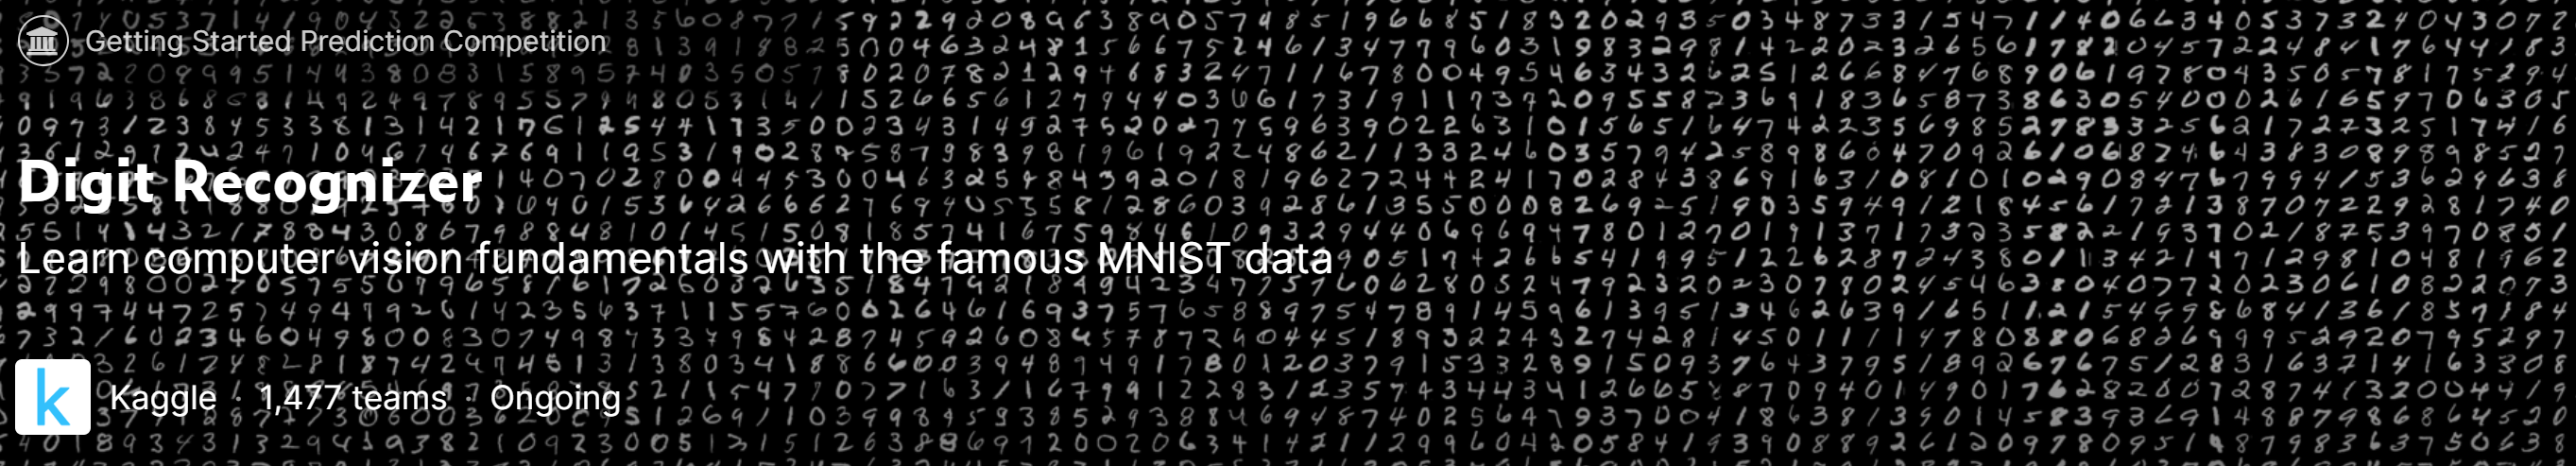

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.utils import to_categorical

# 2. Load the data with digits

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Split the data into X and Y

In [4]:
X = train.drop('label', axis=1)
y = train.label

In [5]:
train.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

# 4. Shape of the data

In [6]:
print(X.shape)
print(test.shape)

(42000, 784)
(28000, 784)


###### In origal MNIST dataset there are 60.000 train images and 10.000 test images

# 5. Transform data in float 64 format for higher accuracy

In [7]:
X = X.astype('float64')
test = test.astype('float64')

# 6. Normalize and reshape the data

In [8]:
X = X.to_numpy()
test = test.to_numpy()

X = X / 255
test /= 255

X = X.reshape((X.shape[0], 28, 28, 1))
test = test.reshape((test.shape[0], 28, 28, 1))

In [9]:
# 7. One-hot encoding for labels
y = to_categorical(y, num_classes=10)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# 7. Creating LeNet-5 model

In [10]:
model = Sequential()

# Convolutions 1 (layer 1)
model.add(Conv2D(
    filters=6,
    kernel_size=(5, 5),
    activation='tanh',
    input_shape=(28, 28, 1)
))

# Subsampling 1 (layer 2)
model.add(AveragePooling2D(pool_size=(2, 2)))

# Convolutions 2 (layer 3)
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))

# Subsampling 2 (layer 4)
model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers (layers 5-7)
model.add(Dense(units=120, activation='tanh'))
model.add(Dense(units=84, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))

### [Article where I found this architecture](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

# 8. Compile the model

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 9. Fit the model

In [12]:
%%time
model.fit(
    X,
    y,
    batch_size=128,
    epochs=100,
)

Epoch 1/100
329/329 [==============================] - 11s 25ms/step - loss: 0.4073 - accuracy: 0.8847
Epoch 2/100
329/329 [==============================] - 8s 24ms/step - loss: 0.1587 - accuracy: 0.9521
Epoch 3/100
329/329 [==============================] - 8s 23ms/step - loss: 0.1091 - accuracy: 0.9664
Epoch 4/100
329/329 [==============================] - 7s 23ms/step - loss: 0.0818 - accuracy: 0.9754
Epoch 5/100
329/329 [==============================] - 8s 24ms/step - loss: 0.0663 - accuracy: 0.9794
Epoch 6/100
329/329 [==============================] - 9s 26ms/step - loss: 0.0551 - accuracy: 0.9831
Epoch 7/100
329/329 [==============================] - 8s 24ms/step - loss: 0.0469 - accuracy: 0.9857
Epoch 8/100
329/329 [==============================] - 8s 24ms/step - loss: 0.0403 - accuracy: 0.9870
Epoch 9/100
329/329 [==============================] - 8s 25ms/step - loss: 0.0324 - accuracy: 0.9900
Epoch 10/100
329/329 [==============================] - 8s 24ms/step - loss: 0.02

# 10. Make predictions and return predicted labels

In [13]:
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)

875/875 [==============================] - 4s 4ms/step


# 11. Create submission file

In [15]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [17]:
submission = pd.DataFrame({
    'ImageId': range(1, len(predicted_labels) + 1), 
    'Label': predicted_labels
})

submission.to_csv('Digit_Recognition_submission_1.csv', index=False)
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
